In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Loan Prediction Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.shape

(614, 13)

In [7]:
# dealing with numeric values
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mean())




In [8]:
#dealing with categorical values
col=['Gender', 'Married', 'Dependents','Self_Employed']
def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col
df=df.apply(lambda col:fillna(col))

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

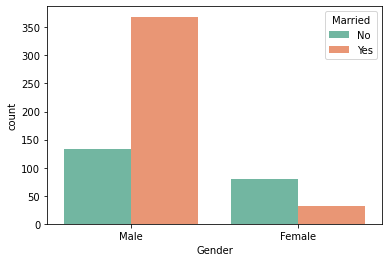

In [10]:
sns.countplot(x='Gender', hue='Married', data=df,palette="Set2");

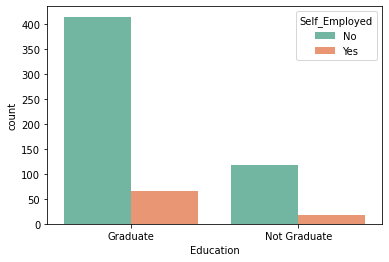

In [11]:
sns.countplot(x='Education', hue='Self_Employed', data=df,palette="Set2");

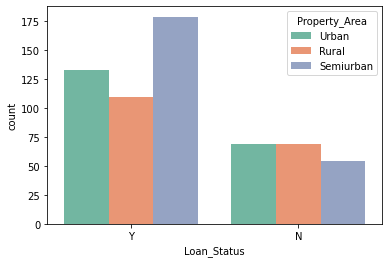

In [12]:
sns.countplot(x='Loan_Status', hue='Property_Area', data=df,palette="Set2");

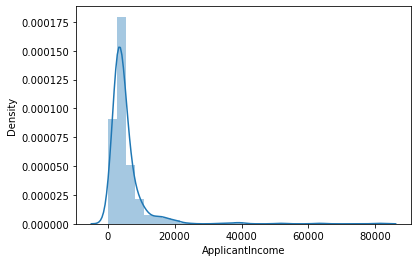

In [13]:
sns.distplot(df['ApplicantIncome'], bins=30);

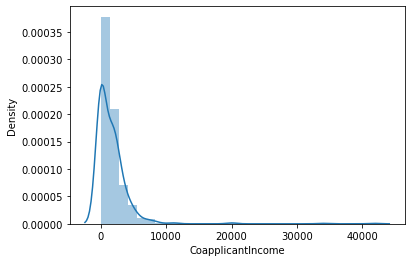

In [14]:
sns.distplot(df['CoapplicantIncome'], bins=30);

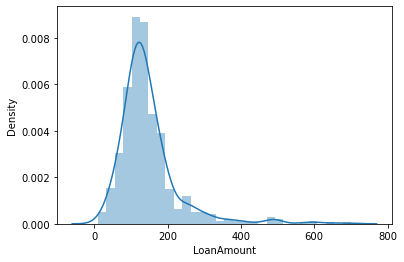

In [15]:
sns.distplot(df['LoanAmount'], bins=30);

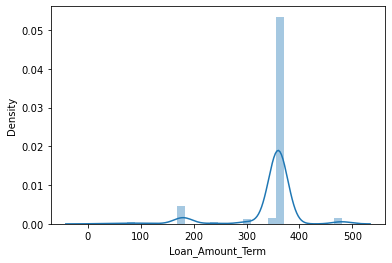

In [16]:
sns.distplot(df['Loan_Amount_Term'], bins=30);

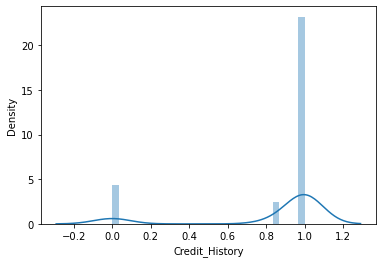

In [17]:
sns.distplot(df['Credit_History'], bins=30);

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [19]:
df['Total_income']=df['ApplicantIncome'] + df['CoapplicantIncome']

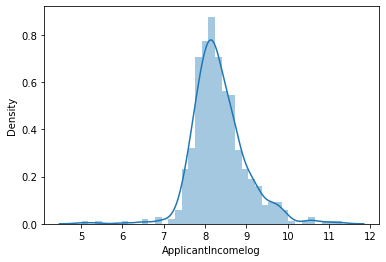

In [20]:
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomelog']);

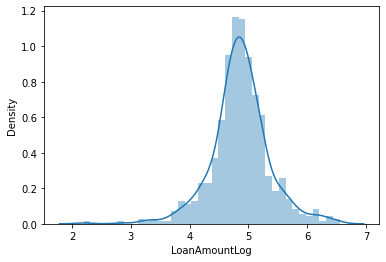

In [21]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"]);

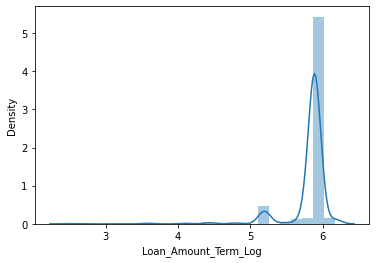

In [22]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"]);

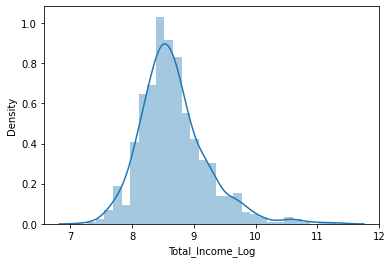

In [23]:
df['Total_Income_Log'] = np.log(df['Total_income'])
sns.distplot(df["Total_Income_Log"]);

In [24]:
corr=df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,ApplicantIncomelog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.790532,0.434849,-0.024085,0.717829
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,-0.237900,0.204179,-0.042941,0.383827
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.551556,0.895324,0.044905,0.687552
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.030739,0.086531,0.938871,-0.055320
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019169,-0.025248,-0.007860,0.019156
Total_income,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.639953,0.503817,-0.042237,0.852873
ApplicantIncomelog,0.790532,-0.237900,0.551556,-0.030739,0.019169,0.639953,1.000000,0.491066,-0.014618,0.740300
LoanAmountLog,0.434849,0.204179,0.895324,0.086531,-0.025248,0.503817,0.491066,1.000000,0.084534,0.657507
Loan_Amount_Term_Log,-0.024085,-0.042941,0.044905,0.938871,-0.007860,-0.042237,-0.014618,0.084534,1.000000,-0.029522
Total_Income_Log,0.717829,0.383827,0.687552,-0.055320,0.019156,0.852873,0.740300,0.657507,-0.029522,1.000000


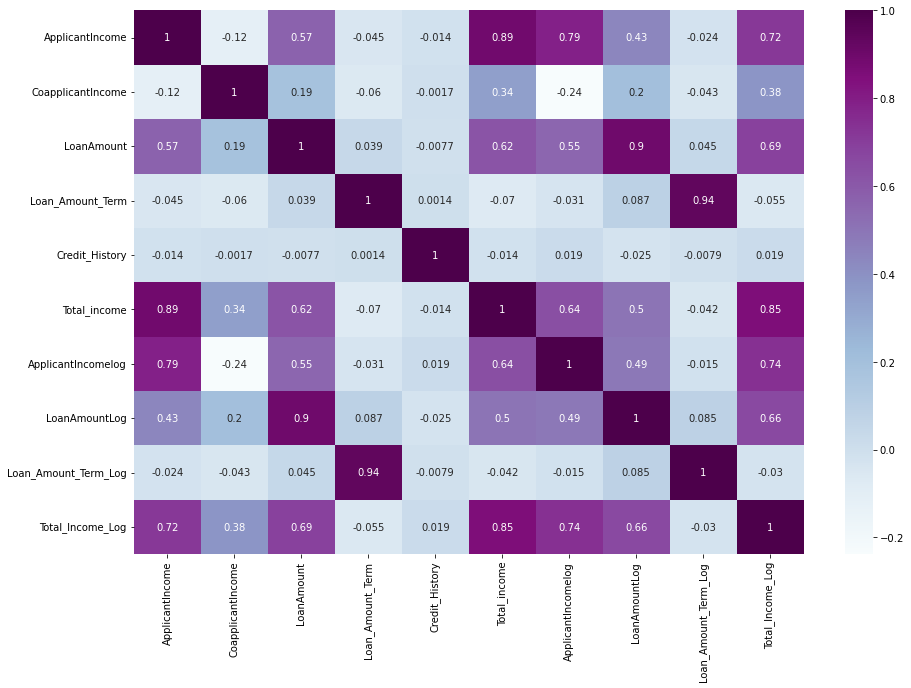

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='BuPu');

In [26]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [27]:
df.loc[:0, df.dtypes == object]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols =['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
for i in cols:
    df[i]=le.fit_transform(df[i])

In [29]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972466,4.262680,5.886104,7.972466
610,1,1,3,0,0,1.0,0,1,8.320205,3.688879,5.192957,8.320205
611,1,1,1,0,0,1.0,2,1,8.996157,5.533389,5.886104,9.025456
612,1,1,2,0,0,1.0,2,1,8.933664,5.231109,5.886104,8.933664


In [30]:
X= df.drop(columns=['Loan_Status'], axis=1)
y=df['Loan_Status']

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print("Accuracy score:",acc_score*100,'\n')
       
    score=cross_val_score(model,X, y, cv=5)
    print("Cross validation is",np.mean(score)*100,'\n')
         
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("confussion matrix")
    print(conf_matrix)

## 1) Lr

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classify(model, X, y)

Accuracy score: 78.91891891891892 

Cross validation is 80.9462881514061 

confussion matrix
[[ 28  37]
 [  2 118]]


## 2) Dt

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
classify(dt, X, y)

Accuracy score: 74.5945945945946 

Cross validation is 70.19992003198719 

confussion matrix
[[40 25]
 [22 98]]


## model tunning

In [36]:
dt_params = {"max_depth": [1,3,5,8,10],
              "min_samples_split": [2,3,5,10,20,50]}
dt_cv_model = GridSearchCV(dt, dt_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)
dt_cv_model.best_params_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


{'max_depth': 3, 'min_samples_split': 2}

In [37]:
dt= DecisionTreeClassifier(max_depth=3, min_samples_split=3 )
classify(dt, X, y)

Accuracy score: 76.75675675675676 

Cross validation is 80.29721444755431 

confussion matrix
[[ 27  38]
 [  5 115]]


## 3) Rf

In [38]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
rf = RandomForestClassifier()
classify(rf, X, y)

Accuracy score: 80.0 

Cross validation is 78.50459816073571 

confussion matrix
[[ 33  32]
 [  5 115]]


## mdole tunning 

In [39]:
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}
rf_cv_model = GridSearchCV(rf, rf_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)
rf_cv_model.best_params_


Fitting 3 folds for each of 64 candidates, totalling 192 fits


{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 1000}

In [56]:
rf = RandomForestClassifier(max_features=3, min_samples_split= 2, n_estimators=1000 )
classify(rf, X, y)

Accuracy score: 79.45945945945945 

Cross validation is 78.50326536052246 

confussion matrix
[[ 31  34]
 [  4 116]]


## 4) ETC

In [41]:
Ext = ExtraTreesClassifier()
classify(Ext, X, y)

Accuracy score: 71.35135135135135 

Cross validation is 76.39077702252433 

confussion matrix
[[ 29  36]
 [ 17 103]]


In [42]:
ext_param={
        'n_estimators': [100,200,500,1000],
        'max_features': [3,5,7,8],
        'min_samples_leaf': [10,15,20],
        'min_samples_split': [2,5,10,20],
    }
ext_cv_model = GridSearchCV(Ext, ext_param, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)
ext_cv_model.best_params_

Fitting 3 folds for each of 192 candidates, totalling 576 fits


{'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 200}

In [43]:
Ext = ExtraTreesClassifier(max_features= 3,min_samples_split= 2, n_estimators=200,min_samples_leaf= 10  )
classify(Ext, X, y)

Accuracy score: 78.37837837837837 

Cross validation is 80.9462881514061 

confussion matrix
[[ 27  38]
 [  2 118]]


## 5) XGB

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
classify(xgb, X, y)

Accuracy score: 77.29729729729729 

Cross validation is 75.5631080900973 

confussion matrix
[[ 34  31]
 [ 11 109]]


## Model Tunning

In [58]:
xgb_params = {"n_estimators": [100, 500, 1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.001,0.01]}
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)
xgb_cv_model.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[10:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 1}

In [59]:
xgb = XGBClassifier(learning_rate= 0.001, max_depth=3, n_estimators= 1000, subsample= 1  )
classify(xgb, X, y)

Accuracy score: 77.29729729729729 

Cross validation is 80.29721444755431 

confussion matrix
[[ 28  37]
 [  5 115]]


## 6) LGBM

In [46]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
classify(lgb, X, y)

Accuracy score: 75.67567567567568 

Cross validation is 76.5480474476876 

confussion matrix
[[ 31  34]
 [ 11 109]]


In [60]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
              "n_estimators": [200, 500, 100],
              "max_depth":[1,2,35,8]}
lgbm_cv_model = GridSearchCV(lgb,lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
lgbm_cv_model.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}

In [61]:
lgb = LGBMClassifier(learning_rate=0.1, max_depth= 1, n_estimators=200)
classify(lgb, X, y)

Accuracy score: 78.37837837837837 

Cross validation is 80.45848327335733 

confussion matrix
[[ 28  37]
 [  3 117]]


## 7) CatBoost

In [47]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
classify(cb, X, y)

Learning rate set to 0.007178
0:	learn: 0.6893245	total: 166ms	remaining: 2m 45s
1:	learn: 0.6855343	total: 169ms	remaining: 1m 24s
2:	learn: 0.6819006	total: 176ms	remaining: 58.5s
3:	learn: 0.6778919	total: 181ms	remaining: 45s
4:	learn: 0.6744606	total: 184ms	remaining: 36.6s
5:	learn: 0.6705712	total: 193ms	remaining: 31.9s
6:	learn: 0.6665637	total: 197ms	remaining: 28s
7:	learn: 0.6627680	total: 202ms	remaining: 25.1s
8:	learn: 0.6590132	total: 207ms	remaining: 22.8s
9:	learn: 0.6554328	total: 212ms	remaining: 20.9s
10:	learn: 0.6522869	total: 214ms	remaining: 19.2s
11:	learn: 0.6489514	total: 223ms	remaining: 18.4s
12:	learn: 0.6453893	total: 227ms	remaining: 17.3s
13:	learn: 0.6417947	total: 233ms	remaining: 16.4s
14:	learn: 0.6384334	total: 237ms	remaining: 15.5s
15:	learn: 0.6355722	total: 238ms	remaining: 14.7s
16:	learn: 0.6326628	total: 241ms	remaining: 13.9s
17:	learn: 0.6294165	total: 246ms	remaining: 13.4s
18:	learn: 0.6263724	total: 252ms	remaining: 13s
19:	learn: 0.62

In [62]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01, 0.03, 0.1],
              "depth":[4,5,8]}
catb_cv_model = GridSearchCV(cb, catb_params, 
                             cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6878262	total: 5.53ms	remaining: 2.76s
1:	learn: 0.6821178	total: 20.1ms	remaining: 5s
2:	learn: 0.6764520	total: 35.9ms	remaining: 5.95s
3:	learn: 0.6716961	total: 37.1ms	remaining: 4.6s
4:	learn: 0.6661567	total: 51.8ms	remaining: 5.12s
5:	learn: 0.6603981	total: 65.9ms	remaining: 5.42s
6:	learn: 0.6551593	total: 79.2ms	remaining: 5.58s
7:	learn: 0.6506169	total: 81.5ms	remaining: 5.01s
8:	learn: 0.6456401	total: 96.2ms	remaining: 5.25s
9:	learn: 0.6407414	total: 110ms	remaining: 5.41s
10:	learn: 0.6364366	total: 113ms	remaining: 5.04s
11:	learn: 0.6324616	total: 116ms	remaining: 4.73s
12:	learn: 0.6283518	total: 119ms	remaining: 4.47s
13:	learn: 0.6241675	total: 121ms	remaining: 4.21s
14:	learn: 0.6202321	total: 124ms	remaining: 3.99s
15:	learn: 0.6154677	total: 159ms	remaining: 4.8s
16:	learn: 0.6119292	total: 161ms	remaining: 4.57s
17:	learn: 0.6076738	total: 174ms	remaining: 4.65s
18:	learn: 0.6042517	total

{'depth': 8, 'iterations': 500, 'learning_rate': 0.01}

In [63]:
cb = CatBoostClassifier(depth= 8, iterations=500, learning_rate=0.01)
classify(cb, X, y)

0:	learn: 0.6878262	total: 6.53ms	remaining: 3.26s
1:	learn: 0.6821178	total: 18.4ms	remaining: 4.58s
2:	learn: 0.6764520	total: 29.5ms	remaining: 4.89s
3:	learn: 0.6716961	total: 30.7ms	remaining: 3.81s
4:	learn: 0.6661567	total: 41.2ms	remaining: 4.08s
5:	learn: 0.6603981	total: 52.1ms	remaining: 4.29s
6:	learn: 0.6551593	total: 108ms	remaining: 7.58s
7:	learn: 0.6506169	total: 110ms	remaining: 6.75s
8:	learn: 0.6456401	total: 121ms	remaining: 6.6s
9:	learn: 0.6407414	total: 135ms	remaining: 6.64s
10:	learn: 0.6364366	total: 139ms	remaining: 6.18s
11:	learn: 0.6324616	total: 150ms	remaining: 6.1s
12:	learn: 0.6283518	total: 156ms	remaining: 5.83s
13:	learn: 0.6241675	total: 160ms	remaining: 5.57s
14:	learn: 0.6202321	total: 162ms	remaining: 5.25s
15:	learn: 0.6154677	total: 174ms	remaining: 5.26s
16:	learn: 0.6119292	total: 175ms	remaining: 4.97s
17:	learn: 0.6076738	total: 183ms	remaining: 4.89s
18:	learn: 0.6042517	total: 185ms	remaining: 4.69s
19:	learn: 0.5998935	total: 196ms	rem

## 8) KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
classify(knn, X, y)

Accuracy score: 71.89189189189189 

Cross validation is 75.56977209116353 

confussion matrix
[[ 23  42]
 [ 10 110]]


## model tunning

In [49]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)
knn_cv_model.best_params_

{'n_neighbors': 9}

In [50]:
knn=KNeighborsClassifier(n_neighbors=9)
classify(knn, X, y)

Accuracy score: 71.89189189189189 

Cross validation is 75.08063441290152 

confussion matrix
[[ 17  48]
 [  4 116]]


## 9) SVM

In [66]:
from sklearn.svm import SVC
svm=SVC()
classify(svm, X, y)

Accuracy score: 64.86486486486487 

Cross validation is 69.70545115287219 

confussion matrix
[[  0  65]
 [  0 120]]


## Model Tunning

In [67]:
svm_params = {"C": np.arange(1,10), "kernel": ["linear","rbf"]}
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)
svm_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'C': 1, 'kernel': 'linear'}

In [68]:
svm=SVC(C= 1, kernel='linear')
classify(svm, X, y)

Accuracy score: 78.37837837837837 

Cross validation is 80.9462881514061 

confussion matrix
[[ 27  38]
 [  2 118]]


## 10) GNB

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
classify(gnb, X, y)

Accuracy score: 77.29729729729729 

Cross validation is 79.31627349060376 

confussion matrix
[[ 28  37]
 [  5 115]]


## 11) GBC

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
classify(GBC, X, y)

Accuracy score: 75.67567567567568 

Cross validation is 77.04118352658936 

confussion matrix
[[ 31  34]
 [ 11 109]]


## model tunning

In [72]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
             "n_estimators": [100, 300, 500, 1000],
             "max_depth":[2,3,5,8]}
gbm_cv_model= GridSearchCV(GBC, gbm_params, 
                           cv = 5, 
                           n_jobs = -1, verbose = 2).fit(X_train, y_train)
gbm_cv_model.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [73]:
GBC=GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=100)
classify(GBC, X, y)

Accuracy score: 76.75675675675676 

Cross validation is 80.13461282153806 

confussion matrix
[[ 27  38]
 [  5 115]]


## 12)  MLPC

In [75]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier(solver = "lbfgs", activation = "logistic")
classify(MLP, X, y)

Accuracy score: 73.51351351351352 

Cross validation is 78.01679328268692 

confussion matrix
[[ 34  31]
 [ 18 102]]


## Model Tunning

In [76]:
mlpc_params = {"alpha":[1,5, 0.1,0.01, 0.03, 0.005, 0.0001],
              "hidden_layer_sizes": [(10,10), (100,100,100), (100,100), (3,5)]}

In [77]:
mlpc_cv_model = GridSearchCV(MLP, mlpc_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [78]:
mlpc_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (10, 10)}

In [79]:
mlpc_tuned = MLPClassifier(solver = "lbfgs",activation='logistic', alpha =0.01, hidden_layer_sizes = (10, 10))
classify(MLP, X, y)

Accuracy score: 72.97297297297297 

Cross validation is 77.02918832467013 

confussion matrix
[[ 34  31]
 [ 19 101]]


## All modells comparing

In [96]:
models=[lr,dt,rf,Ext, xgb, lgb,cb,knn,svm,gnb,GBC,MLP]
result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[name, score*100]], columns= ["Models","Accuracy"])
    results = results.append(result)



0:	learn: 0.6878262	total: 13.4ms	remaining: 6.71s
1:	learn: 0.6821178	total: 20.1ms	remaining: 5.01s
2:	learn: 0.6764520	total: 26.6ms	remaining: 4.41s
3:	learn: 0.6716961	total: 27.5ms	remaining: 3.41s
4:	learn: 0.6661567	total: 34.3ms	remaining: 3.39s
5:	learn: 0.6603981	total: 41.1ms	remaining: 3.38s
6:	learn: 0.6551593	total: 47.6ms	remaining: 3.35s
7:	learn: 0.6506169	total: 48.9ms	remaining: 3.01s
8:	learn: 0.6456401	total: 55.9ms	remaining: 3.05s
9:	learn: 0.6407414	total: 62.5ms	remaining: 3.06s
10:	learn: 0.6364366	total: 64.1ms	remaining: 2.85s
11:	learn: 0.6324616	total: 65ms	remaining: 2.64s
12:	learn: 0.6283518	total: 66.6ms	remaining: 2.49s
13:	learn: 0.6241675	total: 68ms	remaining: 2.36s
14:	learn: 0.6202321	total: 69.3ms	remaining: 2.24s
15:	learn: 0.6154677	total: 75.8ms	remaining: 2.29s
16:	learn: 0.6119292	total: 76.9ms	remaining: 2.18s
17:	learn: 0.6076738	total: 83.6ms	remaining: 2.24s
18:	learn: 0.6042517	total: 84.9ms	remaining: 2.15s
19:	learn: 0.5998935	total

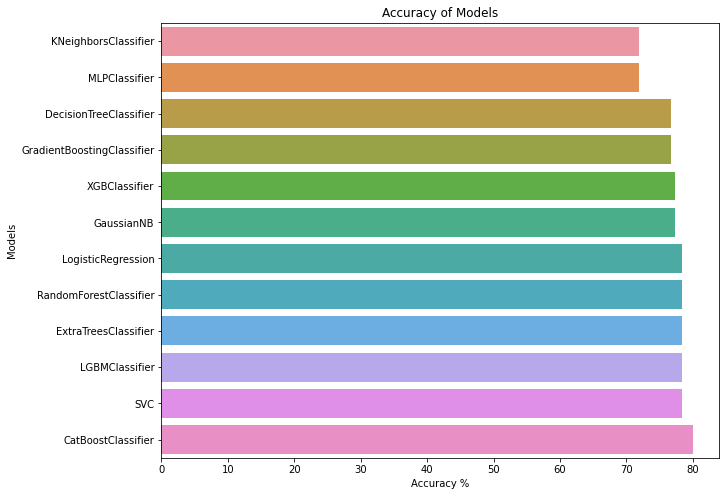

In [105]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'Accuracy', y = 'Models', data=results,order=results.sort_values('Accuracy').Models)
plt.xlabel('Accuracy %')
plt.title('Accuracy of Models');


In [101]:
results

,Models,Accuracy
0,LogisticRegression,78.378378
0,DecisionTreeClassifier,76.756757
0,RandomForestClassifier,78.378378
0,ExtraTreesClassifier,78.378378
0,XGBClassifier,77.297297
0,LGBMClassifier,78.378378
0,CatBoostClassifier,80.000000
0,KNeighborsClassifier,71.891892
0,SVC,78.378378
0,GaussianNB,77.297297
